In [2]:
import logging

import peexcel.utils.nextcloud
from peexcel.utils.targets import Zielwert

var_path = "EE/6_Daten/Quartiere/.VERZEICHNISSE/"
letztstand = "Quartiersvergleich211129cleaned.xlsx"
sheet_name = "PEExcel Import"
index_col = "longname"
file = peexcel.utils.nextcloud.get(var_path+letztstand) #verbose=True)


In [3]:
import pandas as pd

df = pd.read_excel(file, sheet_name=sheet_name, header=2, index_col=index_col)

In [4]:
df



,idx,Variantenname,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),Kiga NGF (m²),...,Unnamed: 401,Unnamed: 402,Projektkennwert alfa,Grenzwert,Projektkennwert beta,Grenzwert.1,CO2 Personen Wohnen (t CO2 /Person a),Grenzwert CO2 Person Wohnen,CO2 Gesamt alle Nutzungen (kg CO2 /m² a),Grenzwert CO2 näherungsweise auf m² bezogen (UAP)
longname,,,,,,,,,,,,,,,,,,,,,
Aichinger 1 Alpha - Bauträger Standard,1,Alpha - Bauträger Standard,Doppelsimulation,2021-11-24 15:11:57,latest,Aichinger,123.800,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 2 Alpha - Aktuell,2,Alpha - Aktuell,Doppelsimulation,2021-11-24 15:12:07,latest,Aichinger,123.800,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 3 Alpha - Netzdienlichkeit,3,Alpha - Netzdienlichkeit,Doppelsimulation,2021-11-24 15:12:18,latest,Aichinger,123.800,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 4 Alpha - Min PEQ,4,Alpha - Min PEQ,Doppelsimulation,2021-11-24 15:12:31,latest,Aichinger,123.800,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 5 Beta - Bauträger Standard,5,Beta - Bauträger Standard,Doppelsimulation,2021-11-24 15:12:45,latest,Aichinger,123.800,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Graz16 12,5Mob Omega - Min PEQ - 75% Nutzerstrom","12,5Mob",Omega - Min PEQ - 75% Nutzerstrom,NaN,44516.595579,NaN,Graz16,17905.232,23481.96,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# clean
# remove empty rows
# remove outdated rows:
# rows that do not have Simualtion = "Doppelsimulation"
df = df.drop(df[(df.FILE != "latest")].index)
df

,idx,Variantenname,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),Kiga NGF (m²),...,Unnamed: 401,Unnamed: 402,Projektkennwert alfa,Grenzwert,Projektkennwert beta,Grenzwert.1,CO2 Personen Wohnen (t CO2 /Person a),Grenzwert CO2 Person Wohnen,CO2 Gesamt alle Nutzungen (kg CO2 /m² a),Grenzwert CO2 näherungsweise auf m² bezogen (UAP)
longname,,,,,,,,,,,,,,,,,,,,,
Aichinger 1 Alpha - Bauträger Standard,1,Alpha - Bauträger Standard,Doppelsimulation,2021-11-24 15:11:57,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 2 Alpha - Aktuell,2,Alpha - Aktuell,Doppelsimulation,2021-11-24 15:12:07,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 3 Alpha - Netzdienlichkeit,3,Alpha - Netzdienlichkeit,Doppelsimulation,2021-11-24 15:12:18,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 4 Alpha - Min PEQ,4,Alpha - Min PEQ,Doppelsimulation,2021-11-24 15:12:31,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aichinger 5 Beta - Bauträger Standard,5,Beta - Bauträger Standard,Doppelsimulation,2021-11-24 15:12:45,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glan 9Mob Omega - Bauträger Standard,9Mob,Omega - Bauträger Standard,Doppelsimulation,44516.439213,latest,Glan,38994.0,0.0,0.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glan 10Mob Omega - Aktuell,10Mob,Omega - Aktuell,Doppelsimulation,44516.439387,latest,Glan,38994.0,0.0,0.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Glan 11Mob Omega - Netzdienlichkeit,11Mob,Omega - Netzdienlichkeit,Doppelsimulation,44516.439525,latest,Glan,38994.0,0.0,0.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#plotting cols
req_cols = []
# system boundary
for sys in ["Alpha", "Beta", "Omega"]:
    df[sys] = [sys*bool for bool in df.Variantenname.str.contains(sys)]
df["Systemgrenze"] = df["Alpha"] + df["Beta"] + df["Omega"]
req_cols.append("Systemgrenze")

df = df.drop(df[(df.Systemgrenze == "Omega")].index)
df

,idx,Variantenname,Simulation,Berechnungszeitpunkt,FILE,Projekt,Wohnbau NGF (m²),Büro NGF (m²),Schule NGF (m²),Kiga NGF (m²),...,Projektkennwert beta,Grenzwert.1,CO2 Personen Wohnen (t CO2 /Person a),Grenzwert CO2 Person Wohnen,CO2 Gesamt alle Nutzungen (kg CO2 /m² a),Grenzwert CO2 näherungsweise auf m² bezogen (UAP),Alpha,Beta,Omega,Systemgrenze
longname,,,,,,,,,,,,,,,,,,,,,
Aichinger 1 Alpha - Bauträger Standard,1,Alpha - Bauträger Standard,Doppelsimulation,2021-11-24 15:11:57,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Alpha,,,Alpha
Aichinger 2 Alpha - Aktuell,2,Alpha - Aktuell,Doppelsimulation,2021-11-24 15:12:07,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Alpha,,,Alpha
Aichinger 3 Alpha - Netzdienlichkeit,3,Alpha - Netzdienlichkeit,Doppelsimulation,2021-11-24 15:12:18,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Alpha,,,Alpha
Aichinger 4 Alpha - Min PEQ,4,Alpha - Min PEQ,Doppelsimulation,2021-11-24 15:12:31,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Alpha,,,Alpha
Aichinger 5 Beta - Bauträger Standard,5,Beta - Bauträger Standard,Doppelsimulation,2021-11-24 15:12:45,latest,Aichinger,123.8,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,,Beta,,Beta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glan 5Mob Beta - Bauträger Standard,5Mob,Beta - Bauträger Standard,Doppelsimulation,44516.438333,latest,Glan,38994.0,0.0,0.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,,Beta,,Beta
Glan 6Mob Beta - Aktuell,6Mob,Beta - Aktuell,Doppelsimulation,44516.438461,latest,Glan,38994.0,0.0,0.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,,Beta,,Beta
Glan 7Mob Beta - Netzdienlichkeit,7Mob,Beta - Netzdienlichkeit,Doppelsimulation,44516.438646,latest,Glan,38994.0,0.0,0.0,502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,,Beta,,Beta


In [7]:
# project
req_cols.append("Projekt")
# mobility measures
df["Mobilität"] = ["Klima:Aktiv Standard"* (not b) for b in df.idx.astype(str).str.contains("ob")]
df["Mobilität"] += ["Optimiert"*b for b in df.idx.astype(str).str.contains("ob")]
df["Mobilität"]

longname
Aichinger 1 Alpha - Bauträger Standard          Klima:Aktiv Standard
Aichinger 2 Alpha - Aktuell                     Klima:Aktiv Standard
Aichinger 3 Alpha - Netzdienlichkeit            Klima:Aktiv Standard
Aichinger 4 Alpha - Min PEQ                     Klima:Aktiv Standard
Aichinger 5 Beta - Bauträger Standard           Klima:Aktiv Standard
                                                        ...         
Glan 5Mob Beta - Bauträger Standard                        Optimiert
Glan 6Mob Beta - Aktuell                                   Optimiert
Glan 7Mob Beta - Netzdienlichkeit                          Optimiert
Glan 8Mob Beta - Min PEQ                                   Optimiert
Glan 8,5Mob Beta - Min PEQ - 75% Nutzerstrom               Optimiert
Name: Mobilität, Length: 88, dtype: object

In [8]:
# PE-saldo Projektwert
# depends on energy system
df["id"] = df.idx.astype(str).str.extract("(^\d)").astype(int)
df.id

longname
Aichinger 1 Alpha - Bauträger Standard          1
Aichinger 2 Alpha - Aktuell                     2
Aichinger 3 Alpha - Netzdienlichkeit            3
Aichinger 4 Alpha - Min PEQ                     4
Aichinger 5 Beta - Bauträger Standard           5
                                               ..
Glan 5Mob Beta - Bauträger Standard             5
Glan 6Mob Beta - Aktuell                        6
Glan 7Mob Beta - Netzdienlichkeit               7
Glan 8Mob Beta - Min PEQ                        8
Glan 8,5Mob Beta - Min PEQ - 75% Nutzerstrom    8
Name: id, Length: 88, dtype: int32

In [9]:
df["Energiesystem"] = ["Fernwärme"*bool for bool in df.id.floordiv(1).isin([1,5])]
df["Energiesystem"] += ["Wärmepumpe"*bool for bool in df.id.floordiv(1).isin([2,6])]
df["Energiesystem"] += ["WP mit DSM"*bool for bool in df.id.floordiv(1).isin([3,4,7,8])]
df.Energiesystem

longname
Aichinger 1 Alpha - Bauträger Standard           Fernwärme
Aichinger 2 Alpha - Aktuell                     Wärmepumpe
Aichinger 3 Alpha - Netzdienlichkeit            WP mit DSM
Aichinger 4 Alpha - Min PEQ                     WP mit DSM
Aichinger 5 Beta - Bauträger Standard            Fernwärme
                                                   ...    
Glan 5Mob Beta - Bauträger Standard              Fernwärme
Glan 6Mob Beta - Aktuell                        Wärmepumpe
Glan 7Mob Beta - Netzdienlichkeit               WP mit DSM
Glan 8Mob Beta - Min PEQ                        WP mit DSM
Glan 8,5Mob Beta - Min PEQ - 75% Nutzerstrom    WP mit DSM
Name: Energiesystem, Length: 88, dtype: object

In [10]:
#FW Block
offset_map = {
    "Fernwärme": {
            "PEBedarf": {"abc": "HQ", "num":224},
            "PEExport": {"abc": "HR", "num":225},
            "PESaldo": {"abc": "HS", "num":226},
            "Alpha - Dichteausgleich [kWh/m²NGF]": {
                "abc": "HU", "num":228},
        },
        "Wärmepumpe": {
            "PEBedarf": {"abc": "IK", "num":244},
            "PEExport": {"abc": "IL", "num":245},
            "PESaldo": {"abc": "IM", "num":246},
            "Alpha - Dichteausgleich [kWh/m²NGF]": {
                "abc": "IO", "num":248},
        },
        "WP mit DSM": {
            "PEBedarf": {"abc": "KW", "num":308},
            "PEExport": {"abc": "KX", "num":309},
            "PESaldo": {"abc": "KY", "num":310},
            "Alpha - Dichteausgleich [kWh/m²NGF]": {
                "abc": "LA", "num":312},
        }
}

df["saldo_offset"] = [-226 + offset_map[e]["PESaldo"]["num"] for e in df.Energiesystem]
df.saldo_offset

longname
Aichinger 1 Alpha - Bauträger Standard           0
Aichinger 2 Alpha - Aktuell                     20
Aichinger 3 Alpha - Netzdienlichkeit            84
Aichinger 4 Alpha - Min PEQ                     84
Aichinger 5 Beta - Bauträger Standard            0
                                                ..
Glan 5Mob Beta - Bauträger Standard              0
Glan 6Mob Beta - Aktuell                        20
Glan 7Mob Beta - Netzdienlichkeit               84
Glan 8Mob Beta - Min PEQ                        84
Glan 8,5Mob Beta - Min PEQ - 75% Nutzerstrom    84
Name: saldo_offset, Length: 88, dtype: int64

In [11]:
df["PE_Saldo"] = df.iloc[:, 226] * df.Energiesystem.str.contains("Fernwärme")
df["PE_Saldo"] += df.iloc[:, 246] * df.Energiesystem.str.contains("Wärmepumpe")
df["PE_Saldo"] += df.iloc[:, 310] * df.Energiesystem.str.contains("WP mit DSM")
df.PE_Saldo[df.Projekt=="Am Bichl"]
    # df.iloc[i, -1] = df.iloc[i, offset_map[df.loc[row,"Energiesystem"]]["PEBedarf"]["num"]-1]
# offsets=dict(fw=)

longname
Am Bichl 1 Alpha - Bauträger Standard                   -97.727763
Am Bichl 2 Alpha - Aktuell                               -3.461126
Am Bichl 3 Alpha - Netzdienlichkeit                      48.692774
Am Bichl 4 Alpha - Min PEQ                               29.080125
Am Bichl 4.5 Alpha - Min PEQ - 75% Nutzerstrom           35.846388
Am Bichl 5 Beta - Bauträger Standard                   -104.008996
Am Bichl 6 Beta - Aktuell                               -11.794045
Am Bichl 7 Beta - Netzdienlichkeit                       43.646689
Am Bichl 8 Beta - Min PEQ                                24.665779
Am Bichl 8.5 Beta - Min PEQ - 75% Nutzerstrom            31.268614
Am Bichl 6 mobopt Beta - Aktuell                        -11.794045
Am Bichl 7 mobopt Beta - Netzdienlichkeit                43.646689
Am Bichl 8 mobopt Beta - Min PEQ                         24.665779
Am Bichl 8,5 mobopt Beta - Min PEQ - Nutzerstrom 75%     31.268614
Name: PE_Saldo, dtype: float64

In [13]:
from matplotlib import pyplot as plt
from peexcel.utils.plotting import target_of_gfz
import numpy as np
import seaborn as sns
import logging

logging.level=logging.WARNING

zq_zielwert = Zielwert.ZQSynergy()
GFZ = np.linspace(0,6,100)
zw_df = pd.DataFrame()
zw_df["Zielwert"] = zq_zielwert.df(GFZ)
zw_df[""] = np.zeros(len(GFZ))

fig, ax = plt.subplots(1,1, figsize=(10,6))

target_of_gfz(ax, df=zw_df, xlims=(0,6), ylims=(-125,175), color=["red", "darkred"])

df_plot = df[df.Systemgrenze=="Alpha"]
df_plot.Variantenname = df_plot.Variantenname.str\
    .replace("Alpha - ","")\
    .replace(" Standard","")\
    .replace("Bauträger", "Bauträger Standard")\
    .replace("Aktuell", "Aktueller Planungsstand")\
    .replace("Netzdienlichkeit", "Maximalpotential")

sns.scatterplot(x="GFZ", y="PE_Saldo", data=df_plot, ax=ax, hue="Variantenname")
sns.scatterplot(x="GFZ", y="PE_Saldo", data=df_plot[df_plot.Variantenname=="Min PEQ"],
                ax=ax, color="red")
ax.set_ylabel("Primärenergie-Bilanz \n(+Diff. zum Zielwert)\n[$kWh/m²_{NGF}a$]")
for i, proj in enumerate(df_plot.Projekt.unique()):
    df_proj = df_plot[df_plot.Projekt==proj]
    # GFZ marks
    minpeq = df_proj[df_proj["Variantenname"]=="Min PEQ"]["PE_Saldo"][0]
    gfz = df_proj.GFZ.unique()[0]

    #gfz lines
    ax.plot((gfz, gfz),(-100,minpeq), linewidth=0.1, color="grey")
    ax.text(gfz-0.1, -100-(10*(i%2)), round(gfz,2), fontsize=8)

    # min peq bubble
    zw = zq_zielwert.alpha(gfz)
    ax.plot((gfz, gfz), (zw, minpeq), color="red", linewidth=0.6)

    d=0
    if proj in ["Am Bichl", "Gneis"]:
        d = 20
    #beschriftung MIn PEQ
    s = f"{proj}: {round(minpeq)} (+{round(minpeq-zw)})"
    # s = f"{proj} "
    ax.text(gfz+0.1, minpeq+d, s, fontsize=11)

plt.savefig("MinPEQ.png", dpi=300)
    #
    # ax.plot((0.21,0.2,0.2,0.21), (-100, -100, 100, 100))
    # ax.text(0.3, 150, "asdas")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<AxesSubplot:>

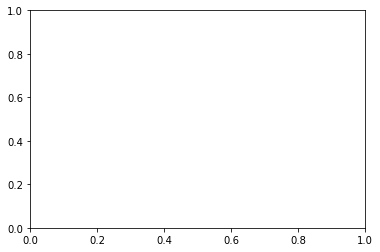

In [ ]:
sns.scatterplot(x="GFZ", y="PE_Saldo", data=df_plot[df_plot.Variantenname=="Alpha - Min PEQ"],
                color="red")

<AxesSubplot:xlabel='GFZ', ylabel='PE_Saldo'>

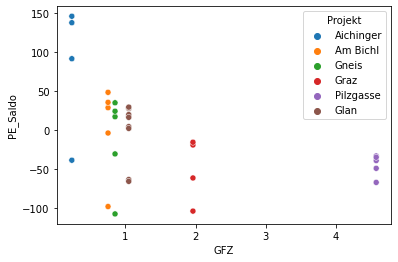

In [ ]:
sns.scatterplot(x="GFZ", y="PE_Saldo", data=df[df.Systemgrenze=="Alpha"], hue="Projekt")